In [39]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import roc_curve
import joblib

In [35]:
df=pd.read_csv('heart_attack_germany_updated.csv')

In [36]:
X=df.drop(columns=['Heart_Attack_Incidence'])
y=df['Heart_Attack_Incidence']
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=20,random_state=42)

Accuracy: 0.4758917046921301
Precision: 0.4840753815304444
Recall: 0.7329145968449327
F1 Score: 0.5830547817173724
ROC AUC Score: 0.5286849578586542


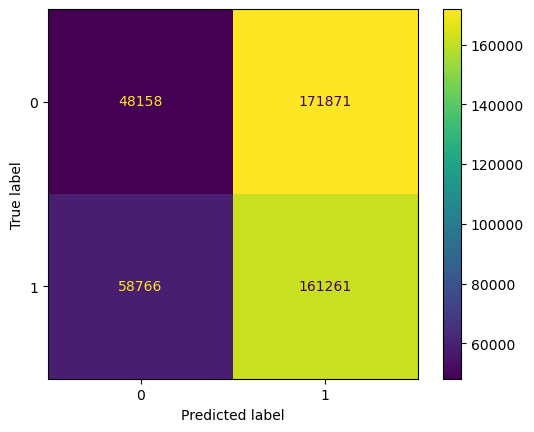

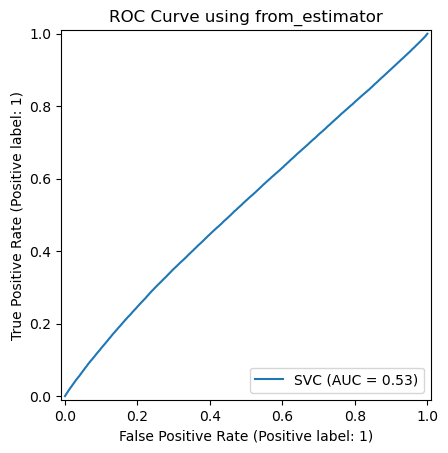

In [42]:
svm=SVC(C=1.0,gamma=0.1 ,kernel='rbf', probability=True, random_state=42)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='binary') #'macro' if classification labels more than 2
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Use positive class probabilities
print(f'ROC AUC Score: {roc_auc}')
ConfusionMatrixDisplay(conf_matrix).plot()
y_pred_proba = svm.predict_proba(X_test)

RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.title('ROC Curve using from_estimator')
plt.show()

Accuracy: 0.5687071645426945
Precision: 0.5546446309670983
Recall: 0.6973598694705649
F1 Score: 0.6178682382029078


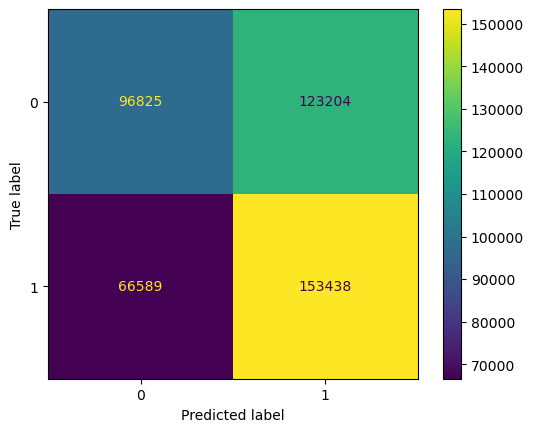

In [32]:
nb=GaussianNB()   #
nb.fit(X_train,y_train) #training phase
y_pred=nb.predict(X_test) #Test the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='binary') #'macro' if classification labels more than 2
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

Accuracy: 0.4849178286399913
Precision: 0.4805563041160412
Recall: 0.37281788144182304
F1 Score: 0.41988610915605606


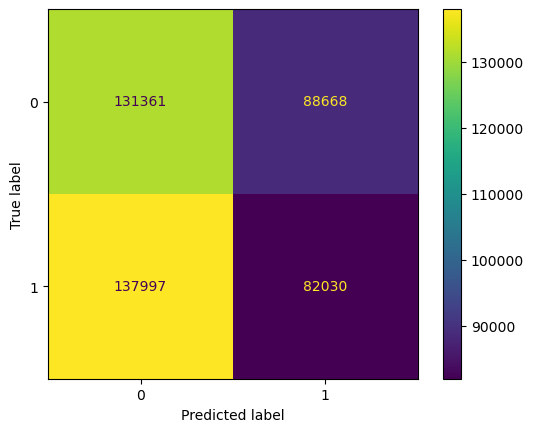

In [33]:
knn=KNeighborsClassifier(n_neighbors=4)   #
knn.fit(X_train,y_train) #training phase
y_pred=knn.predict(X_test) #Test the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='binary') #'macro' if classification labels more than 2
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [43]:
joblib.dump(knn,'svm_model.pkl')

['svm_model.pkl']

In [44]:
model=joblib.load('svm_model.pkl')